In [27]:
import pandas as pd

In [43]:
df = pd.read_csv('tax_data.csv')
print(df.shape)
df = df[df.zipcode!=0]
df.head(10)

(166452, 165)


,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
6,1,AL,35004,1,1460.0,1010.0,200.0,210.0,1340.0,40.0,...,0.0,0.0,110.0,80.0,1210.0,2807.0,1210.0,2795.0,0.0,0.0
7,1,AL,35004,2,1400.0,760.0,280.0,310.0,1310.0,40.0,...,0.0,0.0,190.0,194.0,1210.0,3378.0,1200.0,3335.0,30.0,62.0
8,1,AL,35004,3,1020.0,460.0,350.0,190.0,970.0,30.0,...,0.0,0.0,230.0,357.0,800.0,2131.0,790.0,2119.0,0.0,0.0
9,1,AL,35004,4,630.0,140.0,420.0,60.0,590.0,0.0,...,0.0,0.0,180.0,386.0,450.0,1282.0,440.0,1276.0,0.0,0.0
10,1,AL,35004,5,810.0,80.0,710.0,20.0,760.0,20.0,...,0.0,0.0,290.0,1124.0,530.0,1967.0,510.0,1925.0,20.0,139.0
11,1,AL,35004,6,100.0,0.0,100.0,0.0,90.0,0.0,...,30.0,68.0,50.0,1189.0,50.0,857.0,40.0,426.0,0.0,0.0
12,1,AL,35005,1,1380.0,860.0,140.0,350.0,1260.0,60.0,...,0.0,0.0,100.0,82.0,1200.0,3598.0,1200.0,3594.0,0.0,0.0
13,1,AL,35005,2,1120.0,520.0,190.0,370.0,1040.0,0.0,...,0.0,0.0,160.0,197.0,950.0,3106.0,950.0,3106.0,0.0,0.0
14,1,AL,35005,3,510.0,190.0,170.0,130.0,460.0,30.0,...,0.0,0.0,120.0,236.0,390.0,1030.0,380.0,1029.0,0.0,0.0
15,1,AL,35005,4,220.0,50.0,130.0,50.0,190.0,0.0,...,0.0,0.0,60.0,174.0,160.0,502.0,160.0,500.0,0.0,0.0


In [44]:
groups = df.groupby('agi_stub')

In [45]:
income_groups = groups['N1'].agg('sum')
income_groups

agi_stub
1    50434370.0
2    38987940.0
3    22584830.0
4    14269770.0
5    22379400.0
6     9270090.0
Name: N1, dtype: float64

In [46]:
number_taxed_people = income_groups.sum()
number_taxed_people

157926400.0

This is a lot higher than the amount of taxpaying adults, which leads me to believe there were other factors leading to more returns

In [47]:
total_income_groups = groups['A02650'].agg('sum')
total_income_groups

agi_stub
1    6.342067e+08
2    1.433218e+09
3    1.402418e+09
4    1.248412e+09
5    3.096893e+09
6    4.995941e+09
Name: A02650, dtype: float64

In [48]:
total_income = total_income_groups.sum()
total_income

12811088898.0601

In [49]:
taxable_income_groups = groups['A04800'].agg('sum')
taxable_income_groups

agi_stub
1    1.080618e+08
2    7.598908e+08
3    9.527534e+08
4    9.178478e+08
5    2.481919e+09
6    4.430204e+09
Name: A04800, dtype: float64

There is little income that is not subject to taxes, except for in the lower income brackets

In [50]:
total_taxable_income = taxable_income_groups.sum()
total_taxable_income

9650676347.0

In [51]:
paid_tax_income_groups = groups['A18300'].agg('sum')
paid_tax_income_groups

agi_stub
1     2985825.0
2     7631151.0
3    13669005.0
4    15424581.0
5    43031842.0
6    41634081.0
Name: A18300, dtype: float64

In [52]:
paid_taxes = paid_tax_income_groups.sum()
paid_taxes

124376485.0

248.75 billion seems a bit low for the total taxes payed, especially when they claim there was 1.6 trillion payed in taxes

In [53]:
SandL_tax_income_groups = groups['A18425'].agg('sum')
SandL_tax_income_groups  

agi_stub
1       364478.0
2      1789951.0
3      4944459.0
4      7177493.0
5     30361312.0
6    156646977.0
Name: A18425, dtype: float64

State and local taxes seem to be a lot more progressive than federal taxes

In [54]:
tax_payments_groups = groups['A10600'].agg('sum')
tax_payments_groups

agi_stub
1    1.095026e+08
2    1.578145e+08
3    1.424768e+08
4    1.346116e+08
5    3.861697e+08
6    1.083838e+09
Name: A10600, dtype: float64

In [55]:
total_tax_payments = tax_payments_groups.sum()
total_tax_payments

2014412697.0

4 trillion in taxes paid is more than expected, there must be money gotten back

In [56]:
total_tax_after_credits = groups['A06500'].agg('sum')
total_tax_after_credits

agi_stub
1    8.524598e+06
2    6.267540e+07
3    9.571398e+07
4    1.037884e+08
5    3.439958e+08
6    1.053071e+09
Name: A06500, dtype: float64

Credits seem to have a much larger affect on the lower tax brackets

Note: I was using the attribute 'N02650' and found it to be extremely similar to N1 and it means the number of returns with total income (in the lower brackets it is a tiny bit less than N1), so likely not to be too useful

In [62]:
gp = groups[['N2','N00200']].agg('sum')
proportion_showing_salary_and_wages = gp['N00200'] / gp['N2']
proportion_showing_salary_and_wages.head(10)

agi_stub
1    0.536283
2    0.496396
3    0.448528
4    0.387315
5    0.345566
6    0.317654
dtype: float64

FLAT INCOME TAX ANALYSIS

In [72]:
gp = df.groupby(['STATE'])[['A00100','A04800','A06500']].sum()
gp.A04800
gp.A06500
gp['flat_income_tax_rate'] = gp.A06500/gp.A04800 * 100
gp.head(10)

,A00100,A04800,A06500,flat_income_tax_rate
STATE,,,,
AK,2.647353e+07,2.019262e+07,3143668.0,15.568398
AL,1.382928e+08,9.800401e+07,14795968.0,15.097309
AR,8.395220e+07,5.790446e+07,8616338.0,14.880267
AZ,2.441997e+08,1.811153e+08,29445653.0,16.257961
CA,1.810625e+09,1.422985e+09,270182147.0,18.987004
CO,2.544586e+08,1.980143e+08,34017780.0,17.179453
CT,1.913297e+08,1.547611e+08,30652187.0,19.806131
DC,3.941942e+07,3.280500e+07,6854117.0,20.893516
DE,3.689880e+07,2.770686e+07,4376717.0,15.796509


<AxesSubplot: xlabel='STATE', ylabel='Calculated Flat Income Tax Rate'>

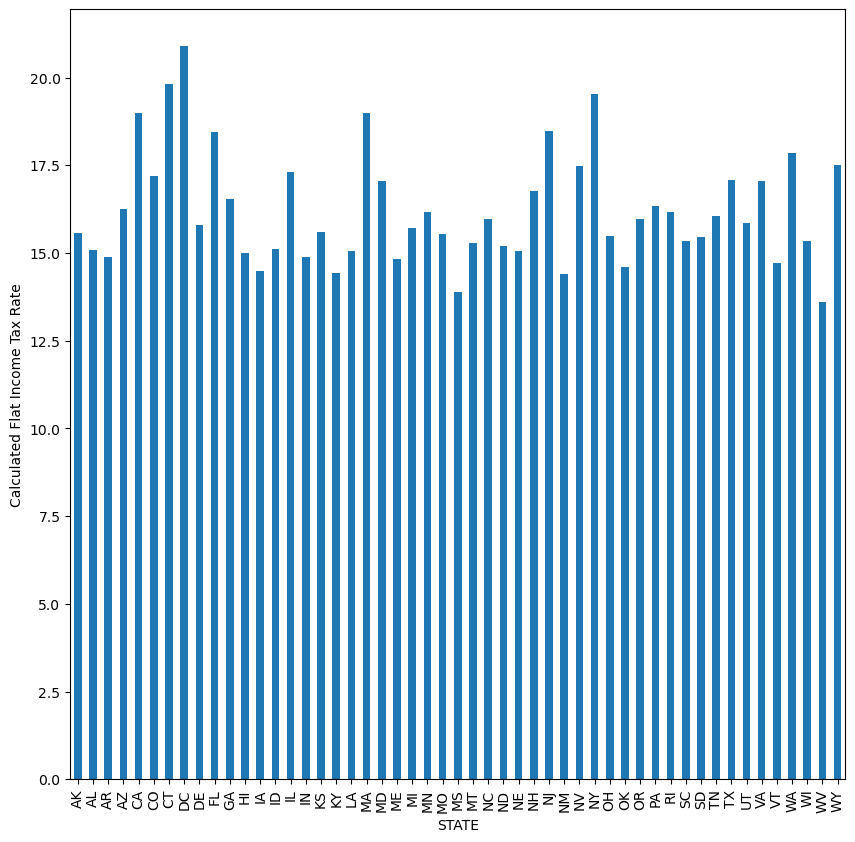

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.xlabel('State')
plt.ylabel('Calculated Flat Income Tax Rate')
gp.flat_income_tax_rate.plot.bar()

In [73]:
gp2 = df.groupby(['STATE'])[['A00100','A04800','A06500','N2']].sum()
gp2['amountMade'] = gp2.A00100/gp2.N2 * 100
gp2.head(10)

,A00100,A04800,A06500,N2,amountMade
STATE,,,,,
AK,2.647353e+07,2.019262e+07,3143668.0,645530.0,4101.052933
AL,1.382928e+08,9.800401e+07,14795968.0,4125190.0,3352.399041
AR,8.395220e+07,5.790446e+07,8616338.0,2523030.0,3327.435702
AZ,2.441997e+08,1.811153e+08,29445653.0,6232970.0,3917.871047
CA,1.810625e+09,1.422985e+09,270182147.0,35166150.0,5148.773047
CO,2.544586e+08,1.980143e+08,34017780.0,5135500.0,4954.893525
CT,1.913297e+08,1.547611e+08,30652187.0,3184500.0,6008.154310
DC,3.941942e+07,3.280500e+07,6854117.0,525330.0,7503.745075
DE,3.689880e+07,2.770686e+07,4376717.0,893610.0,4129.183313


This means that the average amount made is around 4 million (since it is times 1000) in most places, which is not surprising due to the rich people greatly increasing the values

<AxesSubplot: xlabel='STATE', ylabel='Thousands of Dollars Made'>

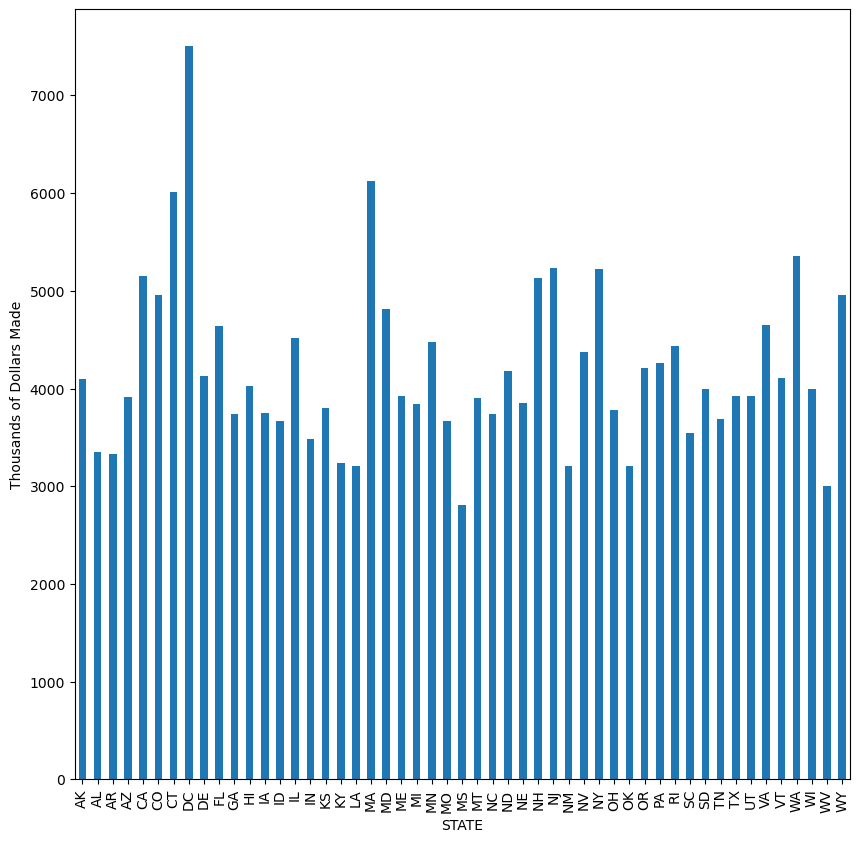

In [83]:
plt.figure(figsize=(10, 10))
plt.xlabel('State')
plt.ylabel('Thousands of Dollars Made')
gp2.amountMade.plot.bar()

In [85]:
gp2['normalized_amount_made'] = gp2.amountMade / gp2.amountMade.sum()
gp2['flat_income_tax'] = gp2.A06500/gp2.A04800 * 100
gp2['normalized_flat_income_tax'] = gp2['flat_income_tax'] / gp2['flat_income_tax'].sum()
gp2.head(10)

,A00100,A04800,A06500,N2,amountMade,normalized_amount_made,normalize_flat_income_tax,flat_income_tax,normalized_flat_income_tax
STATE,,,,,,,,,
AK,2.647353e+07,2.019262e+07,3143668.0,645530.0,4101.052933,0.019159,15.568398,15.568398,0.018845
AL,1.382928e+08,9.800401e+07,14795968.0,4125190.0,3352.399041,0.015661,15.097309,15.097309,0.018275
AR,8.395220e+07,5.790446e+07,8616338.0,2523030.0,3327.435702,0.015545,14.880267,14.880267,0.018012
AZ,2.441997e+08,1.811153e+08,29445653.0,6232970.0,3917.871047,0.018303,16.257961,16.257961,0.019680
CA,1.810625e+09,1.422985e+09,270182147.0,35166150.0,5148.773047,0.024053,18.987004,18.987004,0.022983
CO,2.544586e+08,1.980143e+08,34017780.0,5135500.0,4954.893525,0.023148,17.179453,17.179453,0.020795
CT,1.913297e+08,1.547611e+08,30652187.0,3184500.0,6008.154310,0.028068,19.806131,19.806131,0.023974
DC,3.941942e+07,3.280500e+07,6854117.0,525330.0,7503.745075,0.035055,20.893516,20.893516,0.025291
DE,3.689880e+07,2.770686e+07,4376717.0,893610.0,4129.183313,0.019290,15.796509,15.796509,0.019121


Text(0, 0.5, 'Proportion')

<Figure size 1000x1000 with 0 Axes>

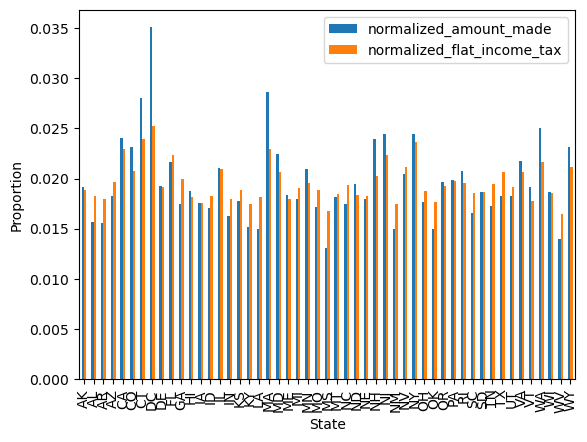

In [97]:
plt.figure(figsize=(10, 10))
gp2[['normalized_amount_made','normalized_flat_income_tax']].plot.bar()
plt.xlabel('State')
plt.ylabel('Proportion')

As we can see in this chart there is a rather obvious correlation between the amount made on average and the income tax (though the extremes differ with income tax remaining more steady compared to the wages which fluctuate greatly). This appears to unsurprisingly show that greater income leads to greater tax paid, which with the current progressive tax system makes sense, however what this also shows is that flat income taxes have little reason to vary as the only reason the taxes are already different are due to higher income coming with higher taxes.

Since we know that a flat tax should be roughly uniform, we have to remember the data surrounding people who pay the taxes. One issue is that the lower classes do not pay taxes as much, which could lead to less income requiring a higher tax, especially considering there is a deficit requiring more income on the federal level

In [108]:
temp = df
temp['MedianIncome'] = temp['A00100'] / temp['N2']
gp3 = temp.groupby(['STATE'])[['AverageIncome']].agg('median')
gp3.head(10)

,AverageIncome
STATE,
AK,34.585714
AL,31.021622
AR,27.452083
AZ,33.116776
CA,35.212625
CO,33.852459
CT,40.315730
DC,56.006115
DE,37.269077


This isn't great since it still technically is not a median of anything since the data does not have individual values, but even so, it is better than the mean income as that was greatly skewed by larger values.

Text(0, 0.5, 'Proportion')

<Figure size 1000x1000 with 0 Axes>

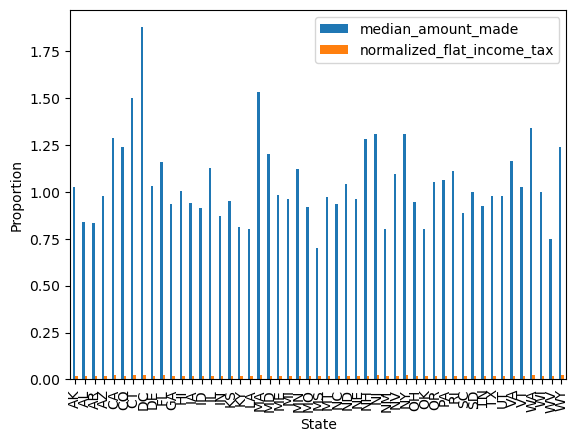

In [100]:
# plt.figure(figsize=(10, 10))
# gp2[['median_amount_made','normalized_flat_income_tax']].plot.bar()
# plt.xlabel('State')
# plt.ylabel('Proportion')